In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight vs Height')

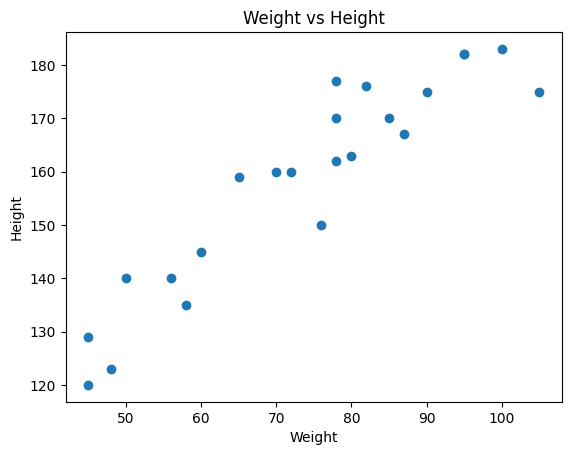

In [4]:
### scatter plot

plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')

In [5]:
### finding correlation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


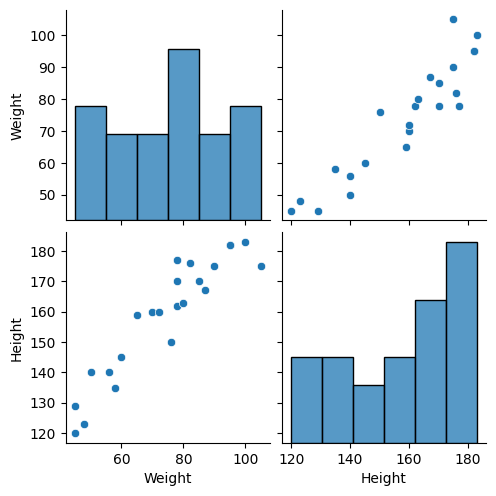

In [6]:
### seaborn for visualization

import seaborn as sns
sns.pairplot(df)

In [7]:
 ### independent and dependent features

x=df[['Weight']]  ###independent feature needs to be in 2 dimension
y=df['Height']

In [8]:
x


,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [9]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [10]:
### train test spli

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [11]:
x_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [12]:
x_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


In [13]:
y_train

1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [14]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
### standardize the input feature only.

scaler=StandardScaler() 
x_train=scaler.fit_transform(x_train)
x_train 

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [17]:
x_test=scaler.transform(x_test)

In [18]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [19]:
### apply linear regression 

from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [20]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [21]:
print(f"coefficient or slope: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")

coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


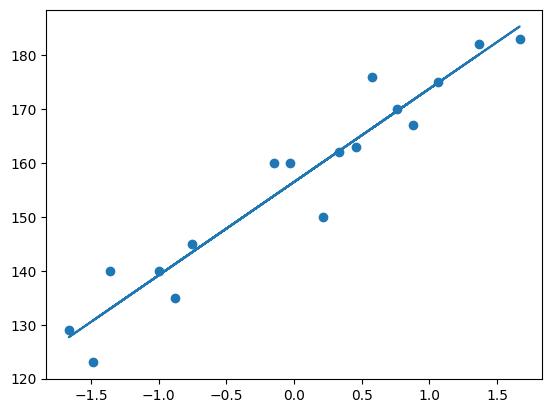

In [22]:
### plot the best fit line plot training data

plt.scatter(x_train, y_train)
plt.plot(x_train,regression.predict(x_train))

In [23]:
###prediction for test data

y_prediction = regression.predict(x_test)

In [24]:
### preformance matrix

from sklearn.metrics import mean_squared_error, mean_absolute_error


In [25]:
mse= mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605
